# EXPLANATION NOTEBOOK

## Introduction

In this notebook, we will explore logistic regression, a popular algorithm for binary classification. We will use the Iris plant dataset from Scikit-learn and the Vowpal Wabbit library to demonstrate logistic regression in action.

In [ ]:
# Installling required packages
!pip install vowpalwabbit

## What is Logistic Regression?

Logistic regression is a statistical method used to model binary or categorical dependent variables. It is a type of regression analysis in which the dependent variable is binary, meaning it can take on only two possible values. The goal of logistic regression is to find the best-fit relationship between the dependent variable and one or more independent variables.

The logistic regression model uses the logistic function, also known as the sigmoid function, to model the probability of the dependent variable taking on a particular value. The sigmoid function is given by:

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

where x is the input to the function.

The output of the sigmoid function is always between 0 and 1, which makes it a useful function for modeling probabilities. In logistic regression, the output of the sigmoid function is interpreted as the probability that the dependent variable takes on a particular value, given the values of the independent variables.

The logistic regression model can be represented mathematically as:

$$
P(Y=1|X) = \sigma(\beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_p X_p)
$$

where $Y$ is the dependent variable (binary), $X$ is a vector of independent variables, and $\beta_0, \beta_1, \beta_2, \dots, \beta_p$ are the coefficients that represent the relationship between the independent variables and the dependent variable.

To estimate the coefficients, the maximum likelihood method is used. The goal is to find the values of the coefficients that maximize the likelihood of observing the data given the model. The likelihood function is given by:

$$
L(\beta) = \prod_{i=1}^n P(Y_i|X_i;\beta)^{Y_i} (1 - P(Y_i|X_i;\beta))^{1 - Y_i}
$$


where $n$ is the number of observations, $Y_i$ is the value of the dependent variable for observation $i$, $X_i$ is the vector of independent variables for observation $i$, and $\beta$ is the vector of coefficients.

To find the coefficients that maximize the likelihood function, we take the derivative of the log-likelihood function with respect to each coefficient and set it equal to zero. This gives us a system of equations that can be solved using numerical methods.

Once we have estimated the coefficients, we can use the logistic regression model to make predictions on new data. We can plug the values of the independent variables into the equation and use the sigmoid function to get the probability that the dependent variable takes on a particular value.

Logistic regression is a widely used statistical method in many fields, including medicine, social sciences, and marketing. It is a powerful tool for predicting binary outcomes and understanding the relationships between independent variables and a binary dependent variable.






## Dataset


For this notebook, we will be using the Iris plant dataset from Scikit-learn. This dataset contains information on the sepal length, sepal width, petal length, and petal width of three different species of Iris plants: Iris setosa, Iris versicolor, and Iris virginica. We will use this dataset to demonstrate logistic regression in action.

First, we will load the dataset using Scikit-learn:

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

## Preprocessing

Before we can apply logistic regression to the Iris plant dataset, we need to preprocess the data. Specifically, we need to encode the target variable (i.e., the species of Iris plant) as a binary output (i.e., 0 or 1).

To do this, we will create a new target variable that is 1 if the species is Iris virginica and 0 otherwise:

In [52]:
import pandas as pd

# Convert the iris dataset to a Pandas dataframe
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# inlcude the target
target_col = 'target'
data[target_col] = iris.target

# Apply the function to the target column
data['target'] = data['target'].apply(lambda x: 1 if x == 2 else 0)

# Print the first few rows of the dataframe
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Exploratory data analysis

In [31]:
# descriptive statistics
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,-0.333333
std,0.828066,0.435866,1.765298,0.762238,0.945968
min,4.300000,2.000000,1.000000,0.100000,-1.000000
25%,5.100000,2.800000,1.600000,0.300000,-1.000000
50%,5.800000,3.000000,4.350000,1.300000,-1.000000
75%,6.400000,3.300000,5.100000,1.800000,1.000000
max,7.900000,4.400000,6.900000,2.500000,1.000000


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


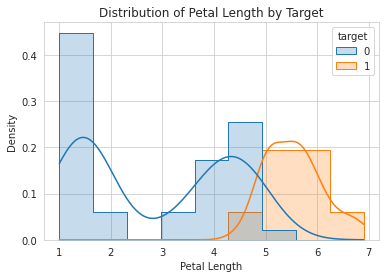

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

# Rename columns
data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target']

# Create histogram with separate colors for each target
sns.histplot(data=data, x='petal_length', hue='target', element='step', stat='density', kde=True)

# Set x and y labels
plt.xlabel('Petal Length')
plt.ylabel('Density')

# Add title
plt.title('Distribution of Petal Length by Target')

# Show the plot
plt.show()


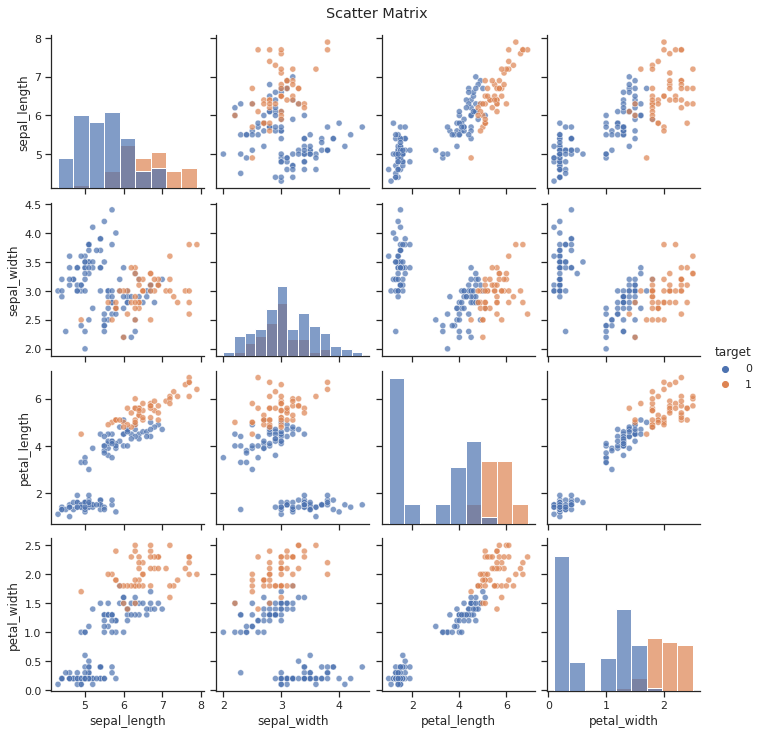

In [126]:
# Set the style of the plots
sns.set(style='ticks')

# Create a pairplot of the data
# hue parameter defines the variable to color the points
# diag_kind parameter specifies the type of diagonal plot (histogram)
# diag_kws and plot_kws are dictionaries that control the appearance of the plots
sns.pairplot(data, hue='target', diag_kind='hist', diag_kws=dict(alpha=0.7), plot_kws=dict(alpha=0.7))

# Set the title of the figure
plt.suptitle('Scatter Matrix', y=1.02)

# Display the plot
plt.show()



## Vowpal Wabbit

Vowpal Wabbit is a fast and efficient machine learning library that is designed to handle large-scale classification problems. It uses an online learning algorithm, which means that it updates the model parameters on the fly as new data becomes available. This makes it particularly suitable for applications where the data is constantly changing or evolving.

To use Vowpal Wabbit for logistic regression, we need to format our data in a specific way. The input data should be a text file where each line represents a single example in the form of a label followed by a list of feature-value pairs. The label should be either +1 or -1, and the feature values should be represented in the form of feature_name:feature_value.

## Implementation
Now that we have a good understanding of the Iris plant dataset, logistic regression, and Vowpal Wabbit, let's move on to implementing logistic regression using Vowpal Wabbit.

In [ ]:
from vowpalwabbit.dftovw import DFtoVW
from vowpalwabbit import Workspace

# Convert the DataFrame to Vowpal Wabbit format
converter = DFtoVW.from_column_names(df=data, y=data.columns[-1], x=data.columns[:-1].values.tolist())
examples = converter.convert_df()

In [114]:
# display 4 examples of the training data
examples[:4]

['0 | sepal_length_(cm):5.1 sepal_width_(cm):3.5 petal_length_(cm):1.4 petal_width_(cm):0.2',
 '0 | sepal_length_(cm):4.9 sepal_width_(cm):3.0 petal_length_(cm):1.4 petal_width_(cm):0.2',
 '0 | sepal_length_(cm):4.7 sepal_width_(cm):3.2 petal_length_(cm):1.3 petal_width_(cm):0.2',
 '0 | sepal_length_(cm):4.6 sepal_width_(cm):3.1 petal_length_(cm):1.5 petal_width_(cm):0.2']

Next, we need to train the logistic regression model using Vowpal Wabbit. We can do this by running the following command in the terminal:

## Model training

In [60]:
# create a Workspace object with logistic loss function
model = Workspace(P=5, loss_function='logistic', enable_logging=True)

# iterate through the training examples and train the model
for ex in examples:
    model.learn(ex)

# finish training and finalize the model
model.finish()


## Prediction analysis

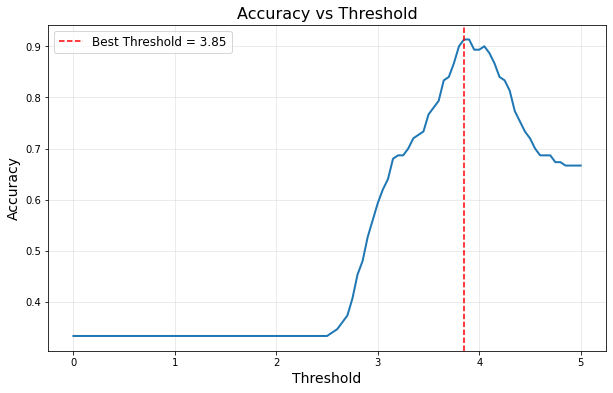

In [121]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# create an array of thresholds to test
thresholds = np.linspace(0, 5, 101)

# true labels
y_test = data['target']

# initialize an array to store the accuracies for each threshold
accuracies = []

# loop over each threshold and calculate the accuracy
for threshold in thresholds:
    preds = []
    for ex in examples:
        score = model.predict(ex)
        label = 1 if score >= threshold else 0
        preds.append(label)
    acc = accuracy_score(y_test, preds)
    accuracies.append(acc)

# find the threshold with the highest accuracy
best_threshold = thresholds[np.argmax(accuracies)]

# plot the accuracy curve
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(thresholds, accuracies, linewidth=2)
ax.axvline(x=best_threshold, color='r', linestyle='--', label=f'Best Threshold = {best_threshold:.2f}')
ax.set_xlabel('Threshold', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)
ax.set_title('Accuracy vs Threshold', fontsize=16)
ax.legend(fontsize=12)
ax.grid(alpha=0.3)
plt.show()


## Evaluation

**Accuracy** is the most straightforward metric for evaluating a binary classification model. It measures the proportion of correctly classified instances out of the total number of instances. In other words, it measures how often the model predicts the correct outcome. The formula for accuracy is:

$$
accuracy = \frac{number~of~correct~predictions}{total~number~of~predictions}
$$

**Precision** is the ratio of true positives to the sum of true positives and false positives. It measures the proportion of correctly predicted positive instances out of the total number of predicted positive instances. Precision is an important metric when the cost of false positives is high, such as in medical diagnosis. The formula for precision is:

$$
precision = \frac{true~positive}{true~positive + false~positive}
$$

**Recall** is the ratio of true positives to the sum of true positives and false negatives. It measures the proportion of actual positive instances that are correctly predicted as positive. Recall is an important metric when the cost of false negatives is high, such as in detecting fraudulent transactions. The formula for recall is:

$$
recall = \frac{true~positive}{true~positive + false~negative}
$$

**F1 score** is the harmonic mean of precision and recall. It combines both precision and recall into a single score that balances the tradeoff between them. The F1 score is a useful metric when precision and recall are both important, such as in information retrieval. The formula for F1 score is:

$$
F1~score = 2 \times \frac{precision \times recall}{precision + recall}
$$

In [123]:
# Get the target values from the data
y_test = data['target']

# Initialize an empty list to store the predicted labels
preds = []

# Set the decision threshold for classification
threshold = 3.85

# Iterate over the examples and predict their labels using the trained model
for ex in examples:
    score = model.predict(ex)  # Get the predicted score for the example
    label = 1 if score >= threshold else 0  # Assign the label based on the decision threshold
    preds.append(label)  # Add the predicted label to the list


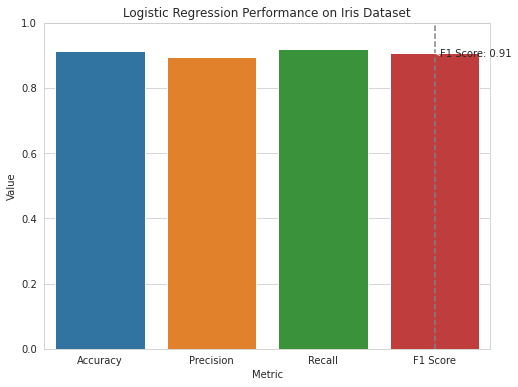

In [124]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, preds)
precision = precision_score(y_test, preds, average='macro')
recall = recall_score(y_test, preds, average='macro')
f1 = f1_score(y_test, preds, average='macro')

# Plot the evaluation metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

# Set up the plot
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the bar chart
sns.barplot(x=metrics, y=values, ax=ax)

# Add labels and titles
ax.set_ylim(0, 1)
ax.set_xlabel('Metric')
ax.set_ylabel('Value')
ax.set_title('Logistic Regression Performance on Iris Dataset')

# Add vertical line for F1 score
ax.axvline(x=3, color='gray', linestyle='--')

# Add annotation for F1 score
ax.annotate(f'F1 Score: {f1:.2f}', xy=(3, f1), xytext=(5, 0),
            textcoords='offset points', ha='left', va='center',
            arrowprops=dict(arrowstyle='->'))

plt.show()


## Conclusion
In this notebook, we have discussed logistic regression, one of the most widely used algorithms for classification problems. We have used the Iris plant dataset from Scikit-learn to demonstrate how logistic regression works, and we have implemented logistic regression using Vowpal Wabbit. We have also evaluated the performance of the logistic regression model using standard metrics such as accuracy, precision, recall, and F1 score.

Logistic regression is a powerful algorithm that can be used for a wide range of classification tasks. It is particularly useful for problems where the decision boundary between the classes is linear or can be approximated by a linear function. With Vowpal Wabbit, we can train logistic regression models quickly and efficiently, even on very large datasets.